<h1>Books vs. Movies</h1>
<h3>The age-old question: is the book really better than the movie?</h3>

<p><strong>All of us avid book readers know what it's like to stumble into a wornderful universe enclosed between the pages of a book, lose ourselves in the adventures, and fall in love with the characters, only to face the incredible disappointment of watching a less-than-perfect movie adaption.
<br>But to be fair, that's not always the case; some movie adaptation have went on to become some of the greatest movies ever made (think, the Harry Potter movies, for example). And yet, the overall assumption remains that the book is always better.
<br>But is it really, or are we being too biased towards the picture we ourselves have painted inside our own imaginations of what the characters should look and sound like, that we are uncapable of recognizing cinematic masterpieces?
<br>In this project, I will attempt to answer these questions based solely on the data collected by the popular websites Goodreads (for books) and IMDB (for movies).</strong></p>

<h2>First things first..</h2>
<p>Before I begin, I am going to import all the libraries I'll be needing in this project:</p>

In [1]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge wordcloud 
from wordcloud import WordCloud

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py35_0 conda-forge

wordcloud-1.4. 100% |################################| Time: 0:00:00  16.36 MB/s
Libraries imported.


<h2>Working with the datasets...</h2>
<p>The first thing i'm going to do is acquire a database containing the names of books as well as their rating. Then, I'll get a database that contains the names of movies as well as their rating. After that, I will compare the databases to determine which books have been made into movies. And finally, I will compare the ratings to find out which has acquired a higher rating.</p>

<h3>1. Goodreads' books dataset:</h3>

<p>I will be using the "Goodreads 10k" datasets that were scraped using the Goodreads API and put together by the Machine Learning blog fastml.com .</p>
<ul>These datasets contains six million ratings for ten thousand most popular (with most ratings) books. There are also:
    <li>books marked to read by the users</li>
    <li>book metadata (author, year, etc.)</li>
    <li>tags/shelves/genres</li></ul>

<h4>First, I will read the dataset that contains the books and their metadata into a dataframe called booksMeta:</h4>

In [2]:
booksMeta = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
booksMeta.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


<h4>Next, I'll read the dataset that conatains the rating into a dataframe called booksRate:</h4>

In [3]:
booksRate = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
booksRate.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


<h4>Then, I'll read the datset that contains the tags into a dataset called booksTag:</h4>

In [4]:
booksTag = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv')
booksTag.head(15)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
5,5,--166-
6,6,--17-
7,7,--19-
8,8,--2-
9,9,--258-


<h4>Finally, I'll read the dataset that connects the tags to the books via ids into a dataset called booksTagC:</h4>

In [5]:
booksTagC = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv')
booksTagC.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


<h4>The next thing I'm going to do is clean-up those datasets so that they can match my needs:</h4>

<h4>1. Cleaning up the dataset that contains the books and their metadata:</h4>

In [6]:
#Remove unnessecary columns from booksMeta
col_list = ['goodreads_book_id', 'original_title', 'authors', 'average_rating', 'original_publication_year']
booksMeta = booksMeta[col_list]
booksMeta.head()

,goodreads_book_id,original_title,authors,average_rating,original_publication_year
0,2767052,The Hunger Games,Suzanne Collins,4.34,2008.0
1,3,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44,1997.0
2,41865,Twilight,Stephenie Meyer,3.57,2005.0
3,2657,To Kill a Mockingbird,Harper Lee,4.25,1960.0
4,4671,The Great Gatsby,F. Scott Fitzgerald,3.89,1925.0


In [7]:
booksMeta.shape

(10000, 5)

<h4>2. Cleaning up the datasets that contain the tags:</h4>

In [8]:
#drop coount from booksTagC
booksTagC = booksTagC.drop(columns=['count'])

#merge the two tag dataframe
booksTag = pd.merge(booksTag, booksTagC, on='tag_id', how='inner')


#convert tag id to string so we can aggregate later
booksTag['tag_id'] = booksTag['tag_id'].astype(str)
booksTag.head()

,tag_id,tag_name,goodreads_book_id
0,0,-,665
1,0,-,81176
2,0,-,147074
3,0,-,2983489
4,0,-,6713071


In [9]:
#Group by book id
booksTag = booksTag.groupby(['goodreads_book_id']).agg(lambda x: ','.join(set(x))).reset_index()
booksTag.head()

,goodreads_book_id,tag_id,tag_name
0,1,"25167,8717,25770,24092,22753,1691,30574,33124,...","classics,owned,potter,audiobook,children-s,to-..."
1,2,"25149,33121,8717,5776,20125,14064,20547,11643,...","borrowed,books-i-have,owned,potter,classic,aud..."
2,3,"25167,25149,8717,25770,22753,1691,30574,33124,...","classics,owned,classic,audiobook,children-s,to..."
3,5,"25167,25149,8717,25770,22753,1691,30574,33124,...","classics,owned,audiobook,children-s,to-read,co..."
4,6,"25167,25149,29190,25770,24092,22753,1691,30574...","classics,owned,potter,séries,classic,audiobook..."


In [10]:
booksTag.shape

(10000, 3)

<h5>The resulting dataframe contains every single tag that each of the books has.</h5

<h4>3. Merging into one dataframe for books:</h4>

In [11]:
#Merge booksMeta with booksTag
booksMeta = pd.merge(booksMeta, booksTag, on='goodreads_book_id', how='inner').fillna(0)
booksMeta.head()

,goodreads_book_id,original_title,authors,average_rating,original_publication_year,tag_id,tag_name
0,2767052,The Hunger Games,Suzanne Collins,4.34,2008.0,"10064,25149,7924,8717,24992,27398,1691,26771,3...","borrowed,owned,read-2012,audiobook,to-read,201..."
1,3,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44,1997.0,"25167,25149,8717,25770,22753,1691,30574,33124,...","classics,owned,classic,audiobook,children-s,to..."
2,41865,Twilight,Stephenie Meyer,3.57,2005.0,"1416,7924,8717,29190,9638,14064,6750,20547,227...","books-i-have,romantic,séries,audiobook,guilty-..."
3,2657,To Kill a Mockingbird,Harper Lee,4.25,1960.0,"32586,11221,8717,3885,13992,31656,22753,29716,...","classics,owned,read-in-school,classic,audioboo..."
4,4671,The Great Gatsby,F. Scott Fitzgerald,3.89,1925.0,"32586,25167,25149,8717,3885,31656,22753,29716,...","classics,owned,read-in-school,classic,audioboo..."


In [12]:
booksMeta.shape

(10000, 7)

<h5>The resulting booksMeta datafrmae contains every single tag that each of the books has, as well as the average rating for each of them.</h5>
<h4>Now, I will figure out which of these 10k books was turned into a movie by finding all the books with a tag containig the word 'movie'.</h4>

In [13]:
#keep only rows that contain the word movie in the tags' column
booksMetaMovie = booksMeta[booksMeta['tag_name'].str.contains("movie")]
booksMetaMovie.head(15)

,goodreads_book_id,original_title,authors,average_rating,original_publication_year,tag_id,tag_name
2,41865,Twilight,Stephenie Meyer,3.57,2005.0,"1416,7924,8717,29190,9638,14064,6750,20547,227...","books-i-have,romantic,séries,audiobook,guilty-..."
4,4671,The Great Gatsby,F. Scott Fitzgerald,3.89,1925.0,"32586,25167,25149,8717,3885,31656,22753,29716,...","classics,owned,read-in-school,classic,audioboo..."
8,960,Angels & Demons,Dan Brown,3.85,2000.0,"32586,1416,8717,14064,30381,20547,22753,1691,9...","borrowed,classics,owned,popular-fiction,other,..."
11,13335037,Divergent,Veronica Roth,4.24,2011.0,"10064,25167,25149,8717,32099,22753,1691,26771,...","borrowed,owned,divergent,veronica-roth,read-20..."
15,2429135,Män som hatar kvinnor,"Stieg Larsson, Reg Keeland",4.11,2005.0,"32586,9484,1416,8717,9638,24992,14064,30381,20...","borrowed,owned,audiobook,adult,murder-mystery,..."
16,6148028,Catching Fire,Suzanne Collins,4.30,2009.0,"10064,25167,25149,8717,24992,27398,1691,26771,...","borrowed,owned,read-2012,audiobook,to-read,201..."
18,34,The Fellowship of the Ring,J.R.R. Tolkien,4.34,1954.0,"11314,1416,8717,5776,29190,9638,14064,20547,22...","classics,owned,séries,classic,audiobook,20th-c..."
20,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré",4.46,2003.0,"25149,33121,8717,5776,20125,14064,20547,11643,...","borrowed,books-i-have,owned,potter,classic,aud..."
21,12232938,The Lovely Bones,Alice Sebold,3.77,2002.0,"32586,11221,9484,1416,8717,9638,18919,14064,67...","borrowed,classics,owned,other,audiobook,adult,..."
25,968,The Da Vinci Code,Dan Brown,3.79,2003.0,"1416,8717,14064,30381,20547,22753,1691,9336,14...","borrowed,classics,owned,popular-fiction,other,..."


In [14]:
#Check size of dataframe (number of books that were turned into movies)
booksMetaMovie.shape

(702, 7)

<h5>The resulting dataframe contains all the books that were turned into movies with their ratings.</h5>
<h5>I can use the ratings from 702 books that we turned into movies</h5>

<h3>2. IMDB's movies dataset:</h3>

<p>I will be using the "IMDB 5000 dataset" found on Koggle.com, which contains the data on 5000 movies scraped from IMDB.</p>

<h4>First, I will read this dataset that contains the movies and their metadata into a dataframe called moviesMeta:</h4>

In [15]:
moviesMeta = pd.read_csv('https://raw.githubusercontent.com/Farahdarwich/Coursera_Capstone/master/movie_metadata.csv')
moviesMeta.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


<h4>For this analysis, I only need the names of the movies and their IMDB scores (ratings).</h4>

In [16]:
#Remove all unnessecary columns
col_name = ['movie_title', 'imdb_score', 'director_name', 'genres','title_year', 'plot_keywords']
moviesMeta = moviesMeta[col_name]
moviesMeta.head()

,movie_title,imdb_score,director_name,genres,title_year,plot_keywords
0,Avatar,7.9,James Cameron,Action|Adventure|Fantasy|Sci-Fi,2009.0,avatar|future|marine|native|paraplegic
1,Pirates of the Caribbean: At World's End,7.1,Gore Verbinski,Action|Adventure|Fantasy,2007.0,goddess|marriage ceremony|marriage proposal|pi...
2,Spectre,6.8,Sam Mendes,Action|Adventure|Thriller,2015.0,bomb|espionage|sequel|spy|terrorist
3,The Dark Knight Rises,8.5,Christopher Nolan,Action|Thriller,2012.0,deception|imprisonment|lawlessness|police offi...
4,Star Wars: Episode VII - The Force Awakens ...,7.1,Doug Walker,Documentary,NaN,NaN


In [17]:
moviesMeta.shape

(5043, 6)

<h5>The resulting dataframe contains the names and ratings of 5043 different movies.</h5>

<h4>Next, I'm going to merge the final books and movies dataframes into one dataframe (droping all the movies that don't match the names of any books in the process):</h4>

In [18]:
#Change name of title column in both dataframes
booksMetaMovie = booksMetaMovie.rename(columns={"original_title": "title"})
booksMetaMovie['title'] = booksMetaMovie['title'].astype(str)
booksMetaMovie.title = [c.strip() for c in booksMetaMovie.title]

moviesMeta = moviesMeta.rename(columns={"movie_title": "title"})
moviesMeta['title'] = moviesMeta['title'].astype(str)
moviesMeta.title = [c.strip() for c in moviesMeta.title]

In [19]:
#Merge dataframes based on title
BM = pd.merge(moviesMeta, booksMetaMovie, on=['title'], how='inner').drop_duplicates()
#BM = booksMetaMovie.merge(moviesMeta, how='inner', on='title')

BM.head()

,title,imdb_score,director_name,genres,title_year,plot_keywords,goodreads_book_id,authors,average_rating,original_publication_year,tag_id,tag_name
0,The Great Gatsby,7.3,Baz Luhrmann,Drama|Romance,2013.0,ingratitude|mansion|party|title appears in wri...,4671,F. Scott Fitzgerald,3.89,1925.0,"32586,25167,25149,8717,3885,31656,22753,29716,...","classics,owned,read-in-school,classic,audioboo..."
2,The Jungle Book,7.8,Jon Favreau,Adventure|Drama|Family|Fantasy,2016.0,fire|jungle|remake|tiger|wolf,77270,Rudyard Kipling,3.94,1894.0,"32586,25167,1416,8717,5776,14064,22753,1691,26...","classics,owned,children-s-classics,nobel-prize..."
4,The Polar Express,6.6,Robert Zemeckis,Adventure|Animation|Family|Fantasy,2004.0,boy|christmas|christmas eve|north pole|train,420282,Chris Van Allsburg,4.29,1985.0,"8717,7070,6891,6959,20547,22753,1691,14694,103...","classics,owned,holiday-books,caldecott-books,c..."
5,The Curious Case of Benjamin Button,7.8,David Fincher,Drama|Fantasy|Romance,2008.0,deformed baby|diary|lingerie slip|older man yo...,747746,F. Scott Fitzgerald,3.53,1922.0,"32586,25167,25149,18919,31656,20547,27679,2971...","borrowed,owned,stories,seen-the-movie,classic,..."
6,Harry Potter and the Order of the Phoenix,7.5,David Yates,Adventure|Family|Fantasy|Mystery,2007.0,battle|magic|school|teacher|wizard,2,"J.K. Rowling, Mary GrandPré",4.46,2003.0,"25149,33121,8717,5776,20125,14064,20547,11643,...","borrowed,books-i-have,owned,potter,classic,aud..."


In [20]:
BM.shape

(261, 12)

<h5>The resulting dataframe contains information on 261 books that were turned into movies (the metadata on both the books and movies).</h5>

<h4>With that, I have my dataframe.</h4>
<h4>I can now start analyzing the data I have in order to figure out if the book is always better than the movie.</h4>

<br><br>
<h2>Analyzing the data..<h2>

<h3>First, I want to make sure the books and movies I'm working with span enough years to make this analysis as diverse and relevant as possible.</h3>

<h4>1. Visualize publication years for books:</h4>

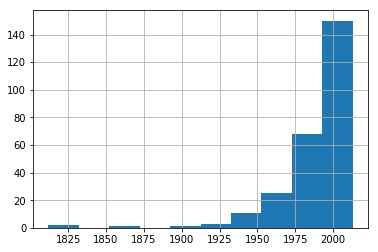

In [21]:
BM.original_publication_year.hist( bins = 10 )

<h5>This means that the books I'm working with range from the early 1800's, all the way to the 2010's, with most of them being published between 1970's ~ 2010's.</h5>

<h4>2. Visualize release year for movies:</h4>

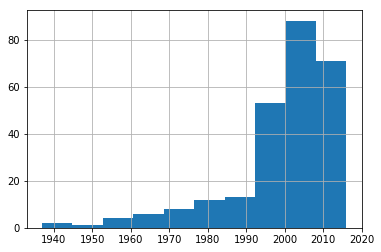

In [22]:
BM.title_year.hist( bins = 10)

<h5>This means that the movies I'm working with range from the late 1930's all the way to 2010's.<h5>

<h4><ol><u>Results:</u><br>
    <br><li>We can conclude that the 'books-to-movies' trend started to gain popularity around the same time that the movie industry began to grow, as the 1930's and 1940's are known to be the 'Golden Age of Hollywood'.</li> 
   <br> <li>This trend gained a significant increase in popularity at the beginnig of the 1990's, with the rise of using computer-generated imagery in the movie making industry.</li>
    <br><li>It is understandable that most of the books that were turned into movies were published in the range (1970's - 2010's) because movie makers seek relevance in their work; they want to make movies with stories that people relate to and therefore want to watch, which is why they flocked towards making movie adaptations of books that had been published recently enough to still cover topics that their target audience would care about.</li>

<h3>Next, I'm going to compare the ratings for the books and their movie adaptations</h3>

<h4>The average rating for the books is calculated out of 5, while the imdb score for the movies is calculated out of 10. I'm going to even things out by multiplying the books' ratings by 2:</h4>

In [23]:
BM['average_rating'] = BM['average_rating']*2

<h4>Now I'm going to visualize each of the books and movies ratings to compare:<h4>

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


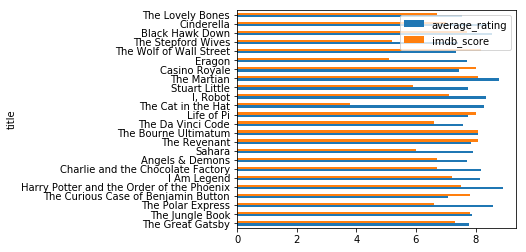

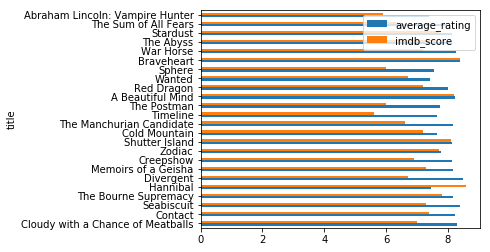

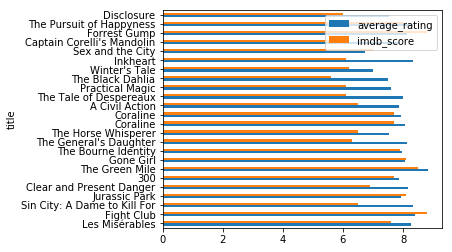

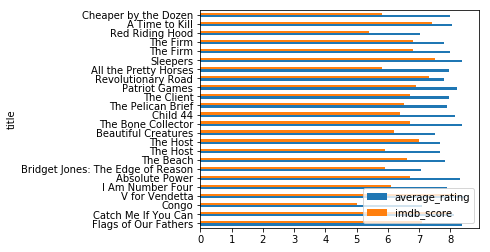

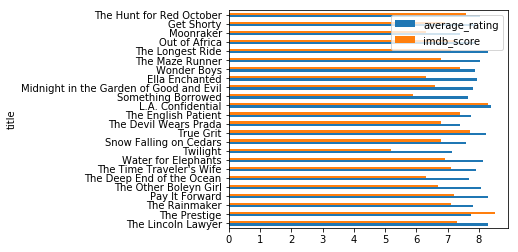

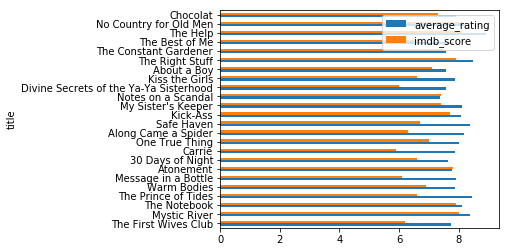

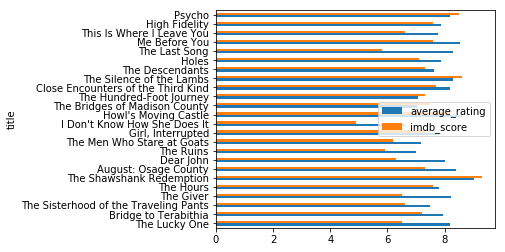

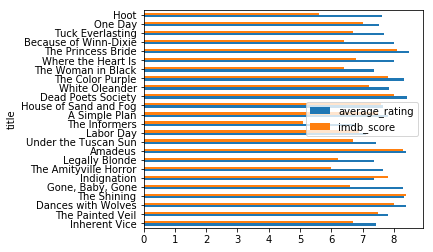

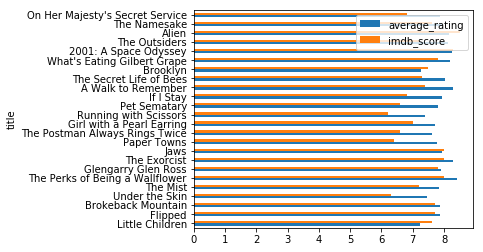

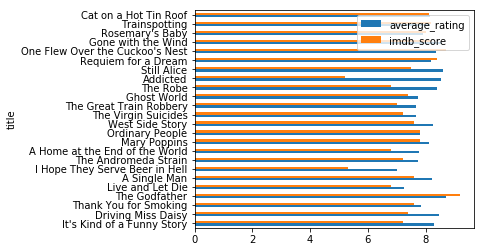

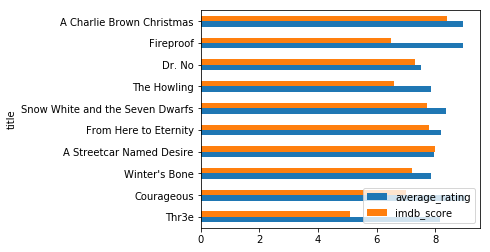

In [24]:
#Generating 11 bar charts, each for 25 rows of the dataframe (last one for 11 rows):
BM.iloc[0:24].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[25:49].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5, 4))
BM.iloc[50:74].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[75:99].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[100:124].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[125:149].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[150:174].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[175:199].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[200:224].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[225:249].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))
BM.iloc[250:260].plot.barh(x="title", y=["average_rating", "imdb_score"], figsize=(5,4))

<h5>At first glance, it seems that most of the books get higher ratings than their movie adaptations, but let's get more specific details on that.</h5>

<h4>Now, I'm going to figure out the percentage of books that get higher/lower/equal rating than theri movie adaptations:</h4>

In [25]:
#Create new dataframe where the book has a higher rating
compHigher = BM[BM['average_rating'] > BM['imdb_score']]

#Create new dataframe where the movie has a higher rating
compLower = BM[BM['average_rating'] < BM['imdb_score']]

#Create new dataframe where the book and movie have the same rating
compEqual = BM[BM['average_rating'] == BM['imdb_score']]

#Creaing those dataframes will help us in further analysis

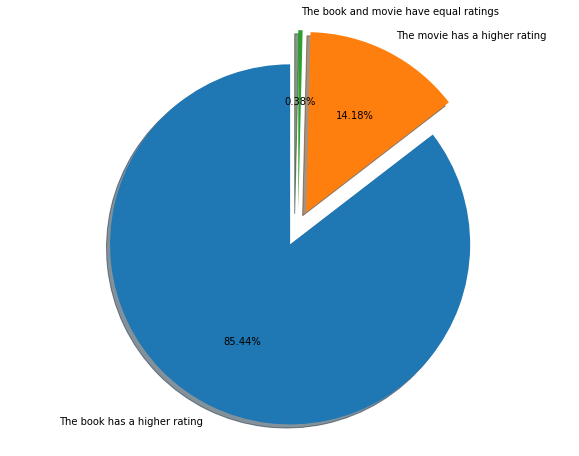

In [26]:
#Generate pie chart
labels = 'The book has a higher rating', 'The movie has a higher rating', 'The book and movie have equal ratings'
sizes = [compHigher.shape[0], compLower.shape[0], compEqual.shape[0]]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=[10,8])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

<h5>We now know for sure that over 85% of the books got higher ratings than their movie adaptations</h5>

<h4><ol><u>Results:</u>
    <br><br>
    Based on the ratings that the 261 books-turned-to-movies and their movie adaptations have:<br><br>
    <li>Exactly 85.44% of the time the book has a higher rating (meaning it was judged by the public as being better than the movie).</li>
    <br><li>The movie got a higher rating than the book exactly 14.18% of the time (meaning it was judged by the public as being better than the book).</li>
    <br><li>The remainig 0.38% is for when the book and the movie got the exact same rating.</li></ol>
    <br>The 14.18% chance of the movie turning out to be better than the book cannot be ignored, so I'm going to explore it further.</h4>
    
    

<h3>Analyzing the cases where the movies have higher ratings than the books they were based on</h3>

<ol>I will base my analysis on 3 main ideas:
    <li>The effects of powerful cinematic technologies on certain genres.</li> 
    <li>The ability to successfuly represent certain concepts in movies vs. in books.</li>
    <li>Relevance of reviewers</li></ol>

<h3>1.The effects of powerful cinematic technologies on certain genres</h3>

<p><u><strong>My theory</strong></u> at this point, is that people generally want the movie to match the images they have generated in their heads while reading the book, as much as possible.<br>This would be exceptionally hard for the movie makers to achieve when it comes to sci-fi and fantasy genres, and even more so if they don't have the adaquate equipment to do so, which was probably the case for older movies.<br></p>
<p>That being said, I think it is safe to assume that with the added help of modern computer-aided movie making techniques, all those fictional universes found in books can be brought to life to the last detail, which in turn would earn the movie higher praise.</p>
<br><p>In short, I belive it all depends on when the movie was made when it comes to sci-fi and fantasy genres:
<ol><li>Older sci-fi/fantasy genre movies have low-quality effects => lower rating.</li>
    <li>Newer sci-fi/fantasy genre movies have high-quality effects => higher rating.</li><ol>

<h4>Determine the percentage of sci-fi movies that got high ratings in the past vs. in earlier years:</h4>

In [27]:
#first split years to new(after 2000) and old(before 20000)
BMYear = BM
BMYear['title_year'] = BMYear['title_year'].dropna().astype(int)
BMYear = BMYear.sort_values('title_year')
BMYearOld = BMYear[BMYear['title_year'] < 2000]
print('Number of movies (based on books) made before 2000: ', BMYearOld.shape[0])
BMYearNew = BMYear[BMYear['title_year'] >= 2000]
print('Number of movies (based on books) made before 2000: ', BMYearNew.shape[0])
print()

#Determine how many old and new sci-fi movies there are
BMYearOldSciFi = BMYearOld[BMYearOld['genres'].str.contains("Sci-Fi")]
print('Number of Sci-Fi movies (based on books) that were made before 2000: ', BMYearOldSciFi.shape[0])
BMYearNewSciFi = BMYearNew[BMYearNew['genres'].str.contains("Sci-Fi")]
print('Number of Sci-Fi movies (based on books) that were made after 2000: ', BMYearNewSciFi.shape[0])
print()

#Determine the rating for old sci-fi movies, as well as how many got high ratings (more than 6.5), and their percentage
BMYearOldSciFiRate = BMYearOldSciFi['imdb_score'].value_counts().to_frame().reset_index().rename(columns={'index':'imdb_score', 'imdb_score':'num_of_movies'})
BMYearOldSciFiRate = BMYearOldSciFiRate.sort_values('imdb_score')
BMYearOldSciFiRate = BMYearOldSciFiRate[BMYearOldSciFiRate['imdb_score'] >= 6.5]
print('High Ratings for old Sci-Fi movies: ',BMYearOldSciFiRate)
print()
print('Number of old Sci-Fi movies with ratings higher than 6.5: ',BMYearOldSciFiRate['num_of_movies'].sum())
print('Percentage of old Sci-Fi movies that got high ratings: ', BMYearOldSciFiRate['num_of_movies'].sum()/BMYearOldSciFi.shape[0]*100,'%')
print()

#Determine the rating for new sci-fi movies, as well as how many got high ratings (more than 6.5), and their percentage
BMYearNewSciFiRate = BMYearNewSciFi['imdb_score'].value_counts().to_frame().reset_index().rename(columns={'index':'imdb_score', 'imdb_score':'num_of_movies'})
BMYearNewSciFiRate = BMYearNewSciFiRate.sort_values('imdb_score')
BMYearNewSciFiRate = BMYearNewSciFiRate[BMYearNewSciFiRate['imdb_score'] >= 6.5]
print('High Ratings for new Sci-Fi movies: ',BMYearNewSciFiRate)
print()
print('Number of new Sci-Fi movies with ratings higher than 6.5: ',BMYearNewSciFiRate['num_of_movies'].sum())
print('Percentage of new Sci-Fi movies that got high ratings: ', BMYearNewSciFiRate['num_of_movies'].sum()/BMYearNewSciFi.shape[0]*100,'%')

Number of movies (based on books) made before 2000:  89
Number of movies (based on books) made before 2000:  169

Number of Sci-Fi movies (based on books) that were made before 2000:  11
Number of Sci-Fi movies (based on books) that were made after 2000:  16

High Ratings for old Sci-Fi movies:     imdb_score  num_of_movies
3         7.2              1
2         7.4              1
7         7.6              1
5         7.7              1
1         8.1              1
6         8.3              1
9         8.5              1

Number of old Sci-Fi movies with ratings higher than 6.5:  7
Percentage of old Sci-Fi movies that got high ratings:  63.6363636364 %

High Ratings for new Sci-Fi movies:      imdb_score  num_of_movies
12         6.5              1
5          6.6              1
11         6.7              1
8          6.8              1
1          7.0              2
0          7.1              2
7          7.2              1
6          8.1              1
13         8.5              1

<h5><ol>What I did here was the following:
    <br><br><li>Split my timeline into old (before the year 2000) and new (after the year 2000), meaning I picked the year 2000 as the year that Hollywood's ability touse the technological advances that started in the 90's in the most efficient ways possible.</li>
    <br><li>Determine the number of sci-fi movies that were made in the past vs. more recently, which are the movies I will be working with in this step.</li>
    <br><li>Gather the ratings (imdb scores) of these movies.</li>
    <br><li>Pick the rating 6.5 as the minimun for a movies to be considered a having a 'high rating'.</li>
    <br><li>Find the total number of old and new movies with 'high ratings'.</li>
    <br><li>Clculate the percentage of old and new movies with 'high ratings'.</li></ol>

<h4><u><strong>Results:</strong></u><br>
    <br>63.64% of old sci-fi movies got higher ratings than the books they were based on, while 68.75% of new got higher ratings than their books.This supports the assumption that when it comes to the sci-fi genre, the technologies used in movie making play a big role in the rating that the movie gets, and its success compared to the book it was based on.</h4>

<h4>Let's visualize those results:</h4>

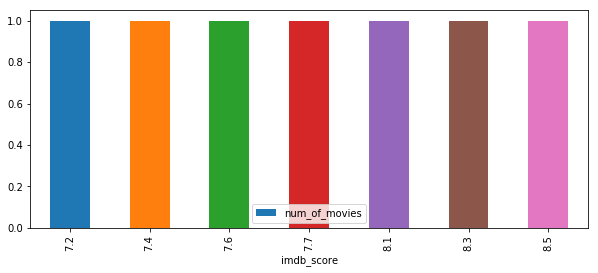

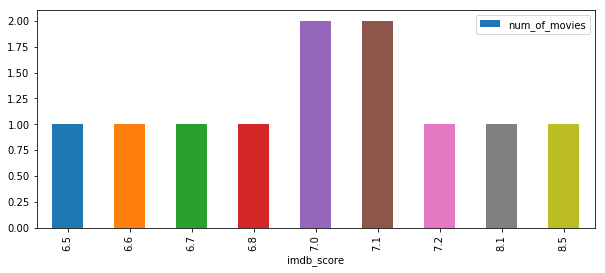

In [28]:
x = BMYearOldSciFi['imdb_score']
y = BMYearOldSciFi['title_year']

xx = BMYearNewSciFi['imdb_score']
yy = BMYearNewSciFi['title_year']

plt.tight_layout()

BMYearOldSciFiRate.plot.bar(x = 'imdb_score', y='num_of_movies', figsize=[10,4])
BMYearNewSciFiRate.plot.bar(x = 'imdb_score', y='num_of_movies', figsize=[10,4])

<h4><u><strong>Results:</strong></u><br><br>
    It is evident by the above bar charts that there are more recent sci-fi movies that got a 'high rating' (over 6.5) compared to old sci-fi movies.</h4>

<br><br>

<h3>2. The ability to successfuly represent certain concepts in movies vs. in books</h3>

<p>Another thing I want to look into is the plot keywords. <u><strong>My theory</strong></u> is that there are certain concepts that movies are better at representing than books, and others that books are better at representing than movies.<p>
   <p>To prove this, I'm going to examine the most common plot keywords in movies that got higher ratings than the books they were based on, and compare them to the ones that are most common in the movies that got lower ratings than the books they were based on.<p>

<h4>First let's look at the most common plot keywords in the movies that got higher ratings than their books:</h4>

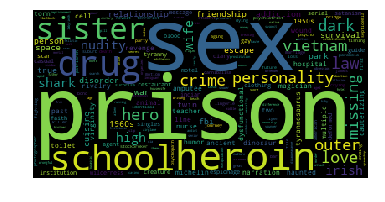

In [29]:
#Save all plot keywords in a list
test1 = compLower['plot_keywords'].str.replace('|',' ')
stacked = pd.DataFrame(test1.str.split().tolist()).stack()

#Drop irrelevant words from list
todrop = ['on', 'in', 'of', 'a', 'an', 'the', 'based', 'to', 'new', 'female', 'male', 'boy', 'girl', 'man', 'woman', 'novel', 'book', 'story']
stacked = stacked[~stacked.isin(todrop)]

#Create dataframe that contains these words (to later determine their counts)
compLowerWords = pd.DataFrame(columns={"key_words"})
compLowerWords['key_words'] = stacked

#Generate wordcloud of the most common plot keywords
wordcloud10 = WordCloud().generate(' '.join(compLowerWords['key_words']))
plt.imshow(wordcloud10)
plt.axis("off")
plt.show()

<h4>Next, let's look at the most common plot keywords in the movies that got lower ratings than their books:</h4>

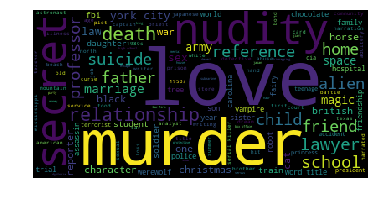

In [30]:
#Save all plot keywords in a list
test2 = compHigher['plot_keywords'].str.replace('|',' ')
stacked2 = pd.DataFrame(test2.str.split().tolist()).stack()

#Drop irrelevant words from list
todrop = ['on', 'in', 'of', 'a', 'an', 'the', 'based', 'to', 'new', 'female', 'male', 'boy', 'girl', 'man', 'woman', 'novel', 'book', 'story']
stacked2 = stacked2[~stacked2.isin(todrop)]

#Create dataframe that contains these words (to later determine their counts)
compHigherWords = pd.DataFrame(columns={"key_words"})
compHigherWords['key_words'] = stacked2

#Generate wordcloud of the most common plot keywords
wordcloud11 = WordCloud().generate(' '.join(compHigherWords['key_words']))
plt.imshow(wordcloud11)
plt.axis("off")
plt.show()

<h5>It is evident from the wordcloud that the most common concepts in movies that got higher ratings than their books are very different than the ones found in movies that got lower ratings.</h5>
<h4>To further prove this, I will list out the top most used concepts in both categories:</h4>

In [31]:
#determine the counts of each of the keywords
compLowerWords = compLowerWords.groupby(['key_words']).size().reset_index(name='counts')

#disregard the keywords that were mentioned less than 3 times
compLowerWords = compLowerWords[compLowerWords['counts'] > 2]
compLowerWords = compLowerWords.sort_values('counts', ascending=False)
compLowerWords

,key_words,counts
163,prison,4
191,sex,4
98,heroin,3
182,school,3


In [32]:
#determine the counts of each of the keywords
compHigherWords = compHigherWords.groupby(['key_words']).size().reset_index(name='counts')

#disregard the keywords that were mentioned less than 3 times
compHigherWords = compHigherWords[compHigherWords['counts'] > 6]
compHigherWords = compHigherWords.sort_values('counts', ascending=False)
compHigherWords.head()

,key_words,counts
491,love,22
545,murder,14
723,school,11
732,secret,10
217,death,10


<h4><u><strong>Results:</strong></u><br><br>
    This analysis proved that there are in fact certain concepts that are better represented in books than in movies, and vice versa.
    <br><br>By comparing the top most common plot keywords in both categories, the results were almost completely different.
    <br><br>It appears that concepts such as prison, sex, and having a female lead are better represented in movies compared to books.
    <br><br>While concepts such as love, musrder, secret, and death are better represented in books.
    <br><br>And of course there are some concepts that work well in both books and movies, such as school.</h4>

<br><br>

<h3>3. Relevance of reviewers</h3>

<p>I think it is important to take into account the people who actually provided reviews and ratings for the books and movies I am anlyzing.</p>
<p>For the purposes of this study, I relied on the data provided by Goodreads for books, and IMDB for movies.</p>
<p>The main idea here is that those website were created at some point in time, but both of them provide information and ratings on books and movies that predate their creation. Keeping in mind that both of these websites (like most others) target users with an average age of 20 ~ 25 years old, we can conclude that the reviews for the books and movies that were released more than 20 years before the creation of the websites were provided by people who have read and seen then outside of their relevant time period.</p>
<p>Goodreads was founded in 2006, while IMDB was founded in 1990. With the added margin of 20 years (average age of users; average time they have had to watch/read the content they're reviewing in its relevant time), I have settled on 1986 as the dividing year between 'more relevant ratings' and 'less relevant ratings'.<br>
<ul><li>IMDB: 1990 - 20 = 1970</li>
    <li>Goodreads: 2006 - 20 = 1986</li></ul></p>
    <p><u><strong>My theory</strong></u> is that it is more likely for a movie to get higher reviews than the book it was based on if both of them were released after the year 1986, than if both of them were released before that year. The reason for that is that the chances of the people providing the rating having read/seen the book/movie in its 'relevant time' of release are higher after the year 1986, since I'm getting the ratings from websites that were founded in the years 1990 and 2006, and the reviewrs are in their 20's by average.</p>

In [33]:
#Create dataframes for books and movies (and both) that were released before 1986
OldBookOldMovieH = compHigher[(compHigher['original_publication_year'] < 1986) & (compHigher['title_year'] < 1986)]
OldBookOldMovieL = compLower[(compLower['original_publication_year'] < 1986) & (compLower['title_year'] < 1986)]
OldBookOldMovie = OldBookOldMovieH.append(OldBookOldMovieL, ignore_index=True)
print('Total number of old movies based on old books: ', OldBookOldMovie.shape[0])

#Create dataframes for books and movies (and both) that were released after 1986
NewBookNewMovieH = compHigher[(compHigher['original_publication_year'] >= 1986) & (compHigher['title_year'] >= 1986)]
NewBookNewMovieL = compLower[(compLower['original_publication_year'] >= 1986) & (compLower['title_year'] >= 1986)]
NewBookNewMovie = NewBookNewMovieH.append(NewBookNewMovieL, ignore_index=True)
print('Total number of new movies based on new books: ', NewBookNewMovie.shape[0])
print()

#Results
print('Number of old movies based on old books that got a lower rating than the book: ', OldBookOldMovieH.shape[0])
print('Number of old movies based on old books that got a higher rating than the book: ', OldBookOldMovieL.shape[0])
print('Number of new movies based on new books that got a lower rating than the book: ', NewBookNewMovieH.shape[0])
print('Number of new movies based on new books that got a higher rating than the book: ', NewBookNewMovieL.shape[0])
print()

print('Percentage of old movies based on old books that got a higher rating: ', OldBookOldMovieL.shape[0] * OldBookOldMovie.shape[0] / 100, '%')
print('Percentage of new movies based on new books that got a higher rating: ', NewBookNewMovieL.shape[0] * NewBookNewMovie.shape[0] / 100, '%')

Total number of old movies based on old books:  34
Total number of new movies based on new books:  181

Number of old movies based on old books that got a lower rating than the book:  25
Number of old movies based on old books that got a higher rating than the book:  9
Number of new movies based on new books that got a lower rating than the book:  159
Number of new movies based on new books that got a higher rating than the book:  22

Percentage of old movies based on old books that got a higher rating:  3.06 %
Percentage of  new movies based on new books that got a higher rating:  39.82 %


<h4><u><strong>Results:</strong></u><br><br>
    It is evident that chances for a movie to get a better rating than the book it was based on are higher if both of them were released after the year 1986, and thus reviewd and rated by more 'relevant reviewrs'.
    <ul><li>3.06% of the movies released before the year 1986 got higher ratings than the books they were based on.</li>
        <li>39.82% of the movies released after the year 1986 got higher ratings than the books they were based on.</li></ul>

<h4>Let's visualize the results:</h4>

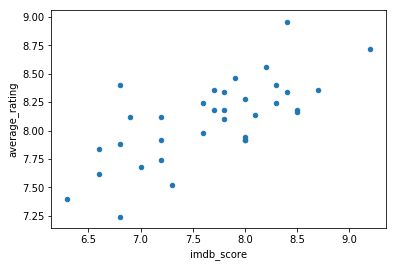

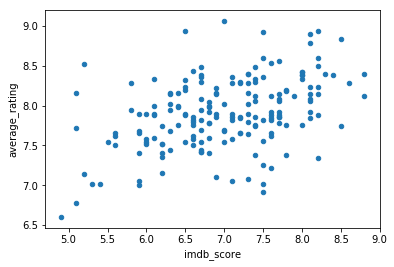

In [74]:
#imdb vs. goodreqads ratigs before 1986
OldBookOldMovie.plot(kind='scatter', x='imdb_score', y='average_rating')
#plt.xlabel('book rating')
#plt.ylabel('imdb score')
plt.show()

#imdb vs. goodreqads ratigs after 1986
NewBookNewMovie.plot(kind='scatter', x='imdb_score', y='average_rating')
#plt.xlabel('book rating')
#plt.ylabel('imdb score')
plt.show()